
# Visualizing neighbor search

Understanding the spatial search used to compute neighborhoods for the Graph Neural Operator. 


In [1]:
import random
import matplotlib.pyplot as plt
import torch

from neuralop.layers.gno_block import GNOBlock
from neuralop.layers.neighbor_search import native_neighbor_search
from neuralop.layers.embeddings import regular_grid_2d

device = 'cpu'

## Basic logic
Many problems involve data collected over irregular point clouds.
The Graph Neural Operator (GNO) is a simple neural operator architecture
that learns a map between functions evaluated on (potentially different) arbitrary point clouds.
For a set of input coordinates Y, an input function f evaluated at all y ∈ Y, 
and a set of output coordinates X, our goal is to map to a new function g evaluated at all x ∈ X.  
To do so, the GNO computes the Nyström approximation of a continuous kernel integral by 
summing the values of f across a neighborhood of each point x drawn from the input coordinates Y (with an optional kernel k):
\int_{N_r(x)} f(y) k(x,y) dy

The first step of this process is a neighbor search:
%%



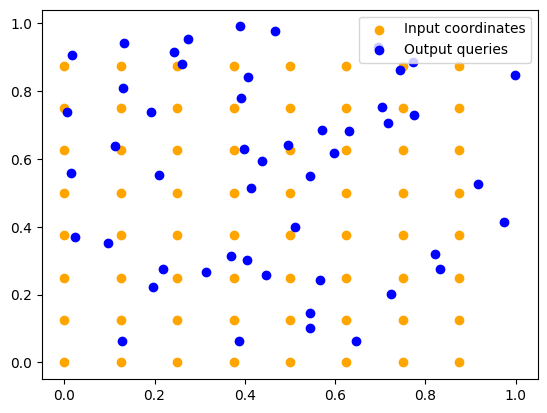

In [2]:
input_coords = torch.stack(regular_grid_2d(spatial_dims=(8,8))).permute(1,2,0).view(-1,2) #reshape into (64, 2)
output_queries = torch.rand([50, 2])

plt.scatter(input_coords[:, 0], input_coords[:, 1], color='orange', label="Input coordinates")
plt.scatter(output_queries[:, 0], output_queries[:, 1], color='blue', label="Output queries")
plt.legend()

## Visualizing neighborhoods
Now, let's select a point in the output and visualize its neighbors.



(0.0, 1.0)

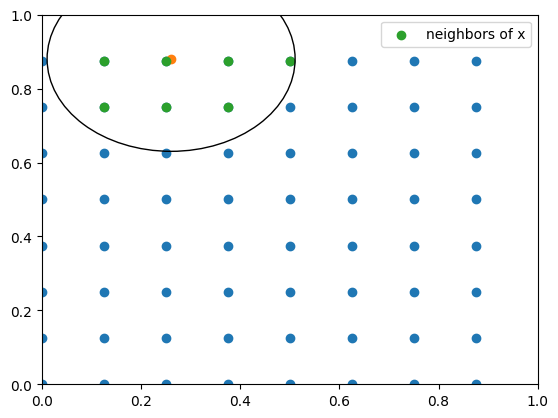

In [5]:
query_index = 25
query_point = output_queries[query_index]
# Let's search, assuming a radius of 0.25. Note that this is quite high for the density of our data.
# in practice we tend to use values that find on the order of 10 neighbors. 
nbr_data = native_neighbor_search(data=input_coords, queries=query_point.unsqueeze(0), radius=0.25)
fig, ax = plt.subplots()
neighbors = input_coords[nbr_data['neighbors_index']]
ax.scatter(input_coords[:, 0], input_coords[:, 1])
ax.scatter(query_point[0], query_point[1])
ax.scatter(neighbors[:, 0], neighbors[:, 1], label="neighbors of x")
c = plt.Circle(query_point, radius=0.25, fill=False)
ax.add_patch(c)
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0,1)